#  Análisis y Limpieza de data sets de películas.

Este notebook tiene como objetivo:
1.  **Cargar y unificar** los datasets de películas y créditos.
2.  **Limpiar** los datos y **extraer** la información anidada (géneros, director, etc.).
3.  **Generar variables** de análisis (ROI, década, categorías de rating).
4.  Realizar **Análisis Exploratorio de Datos (EDA)** para tres ejes principales:
    * **Eje 1:** Rentabilidad (ROI) por Género.
    * **Eje 2:** Relación entre Presupuesto y Rating.
    * **Eje 4:** Directores con Mejor Rating Promedio.

---
##  Inicialización y Librerías

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings
import os

print("INICIANDO LIMPIEZA Y ANÁLISIS DE DATOS TMDB")

INICIANDO LIMPIEZA Y ANÁLISIS DE DATOS TMDB


##  Carga y Exploración Inicial

In [2]:
print("\nCargando datos...")

df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_credits = pd.read_csv('tmdb_5000_credits.csv')

print("Carga de datos completada.")

print("\nExploración inicial:")
print("=" * 40)

print(f"Movies: {df_movies.shape} filas x {df_movies.shape[1]} columnas")
print(f"Credits: {df_credits.shape} filas x {df_credits.shape[1]} columnas")

print("\nColumnas en Movies:")
print(df_movies.columns.tolist())

print("\nValores nulos en Movies (Top 10):")
print(df_movies.isnull().sum().sort_values(ascending=False).head(10))

# Muestra la cabeza de uno de los DataFrames para confirmar la carga
df_movies.head(2)


Cargando datos...
Carga de datos completada.

Exploración inicial:
Movies: (4803, 20) filas x 20 columnas
Credits: (4803, 4) filas x 4 columnas

Columnas en Movies:
['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']

Valores nulos en Movies (Top 10):
homepage          3091
tagline            844
overview             3
runtime              2
release_date         1
id                   0
budget               0
genres               0
original_title       0
popularity           0
dtype: int64


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


##  Unificación de DataFrames

In [3]:
print("\nUniendo DataFrames...")

df = pd.merge(df_movies, df_credits, left_on='id', right_on='movie_id', how='inner')

df.drop(columns=['title_y', 'movie_id'], inplace=True)
df.rename(columns={'title_x': 'title'}, inplace=True)

print(f"DataFrame unificado: {len(df)} filas x {len(df.columns)} columnas")
df.head(2)


Uniendo DataFrames...
DataFrame unificado: 4803 filas x 22 columnas


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


##  Funciones de Extracción JSON

In [4]:
print("\nCreando funciones de extracción para datos anidados...")

def extract_names(json_string):
    if pd.isna(json_string) or json_string == '[]':
        return []
    try:
        data = ast.literal_eval(json_string)
        return [item['name'] for item in data]
    except:
        return []

def extract_director(crew_json):
    if pd.isna(crew_json) or crew_json == '[]':
        return np.nan
    try:
        data = ast.literal_eval(crew_json)
        for member in data:
            if member.get('job') == 'Director':
                return member.get('name')
        return np.nan
    except:
        return np.nan

print("Funciones creadas.")


Creando funciones de extracción para datos anidados...
Funciones creadas.


##  Aplicación de Extracción de Datos Anidados

In [5]:
print("\nExtrayendo datos y creando nuevas columnas...")

df['genres_list'] = df['genres'].apply(extract_names)
df['production_countries_list'] = df['production_countries'].apply(extract_names)
df['cast_names'] = df['cast'].apply(extract_names)
df['director'] = df['crew'].apply(extract_director)

print("Extracción completada. Vista previa de columnas 'genres_list' y 'director':")
df[['genres_list', 'director']].head(2)


Extrayendo datos y creando nuevas columnas...
Extracción completada. Vista previa de columnas 'genres_list' y 'director':


,genres_list,director
0,"[Action, Adventure, Fantasy, Science Fiction]",James Cameron
1,"[Adventure, Fantasy, Action]",Gore Verbinski


##  Limpieza Final y Creación de Variables

In [6]:
print("\nAplicando limpieza básica (fechas, nulos, 0s)...")

df.dropna(subset=['release_date'], inplace=True)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.dropna(subset=['runtime'], inplace=True)
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

print(f"Limpieza completada. Filas restantes: {len(df)}")

print("\nCreando variables de análisis (ROI, categorías)...")

df['roi'] = df['revenue'] / df['budget']
df['release_year'] = df['release_date'].dt.year
df['release_decade'] = (df['release_year'] // 10) * 10

df['runtime_category'] = pd.cut(
    df['runtime'], 
    bins=[0, 60, 120, 180, 1000],
    labels=['Corta (<1h)', 'Media (1-2h)', 'Larga (2-3h)', 'Muy Larga (>3h)']
)

df['rating_category'] = pd.cut(
    df['vote_average'],
    bins=[0, 4, 6, 8, 10],
    labels=['Bajo', 'Medio', 'Alto', 'Excelente']
)

print("Variables creadas.")

print("\nEliminando columnas redundantes...")

columnas_a_eliminar = [
    'genres', 'keywords', 'production_companies', 'production_countries',
    'spoken_languages', 'cast', 'crew', 'tagline', 'homepage', 
    'original_title', 'overview', 'status'
]

df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

print(f"Columnas finales: {len(df.columns)}")

print("\nResumen final del dataset limpio")
print("=" * 60)

print(f"Películas totales: {len(df)}")
print(f"Presupuesto promedio: {df['budget'].mean():.0f}")

# Muestra el resumen estadístico de variables clave
print("\nEstadísticas ROI y Rating:")
print(df[['roi', 'vote_average']].describe().T)

print("\nVista previa del DataFrame limpio:")
df[['title','release_year','budget','revenue','roi','genres_list','director']].head(3)


Aplicando limpieza básica (fechas, nulos, 0s)...
Limpieza completada. Filas restantes: 4800

Creando variables de análisis (ROI, categorías)...
Variables creadas.

Eliminando columnas redundantes...
Columnas finales: 19

Resumen final del dataset limpio
Películas totales: 4800
Presupuesto promedio: 37058535

Estadísticas ROI y Rating:
               count         mean            std           min       25%  \
roi           3229.0  2954.822408  150610.099096  5.217391e-07  1.022463   
vote_average  4800.0     6.094458       1.188366  0.000000e+00  5.600000   

                   50%       75%        max  
roi           2.300366  4.420822  8500000.0  
vote_average  6.200000  6.800000       10.0  

Vista previa del DataFrame limpio:


,title,release_year,budget,revenue,roi,genres_list,director
0,Avatar,2009,237000000.0,2.787965e+09,11.763566,"[Action, Adventure, Fantasy, Science Fiction]",James Cameron
1,Pirates of the Caribbean: At World's End,2007,300000000.0,9.610000e+08,3.203333,"[Adventure, Fantasy, Action]",Gore Verbinski
2,Spectre,2015,245000000.0,8.806746e+08,3.594590,"[Action, Adventure, Crime]",Sam Mendes


##  Guardado del Dataset Limpio

In [7]:
print("\nGuardando dataset limpio...")

df.to_csv('dataset_limpio.csv', index=False)

print("Dataset limpio guardado como 'dataset_limpio.csv'.")


Guardando dataset limpio...
Dataset limpio guardado como 'dataset_limpio.csv'.


---


##  EJE 1: ANÁLISIS DE RENTABILIDAD (ROI) POR GÉNERO
Esta sección analiza cómo el ROI (Retorno de la Inversión) se distribuye entre los distintos géneros cinematográficos.

EJE 1: ANÁLISIS DE RENTABILIDAD POR GÉNERO

CREANDO VISUALIZACIONES...


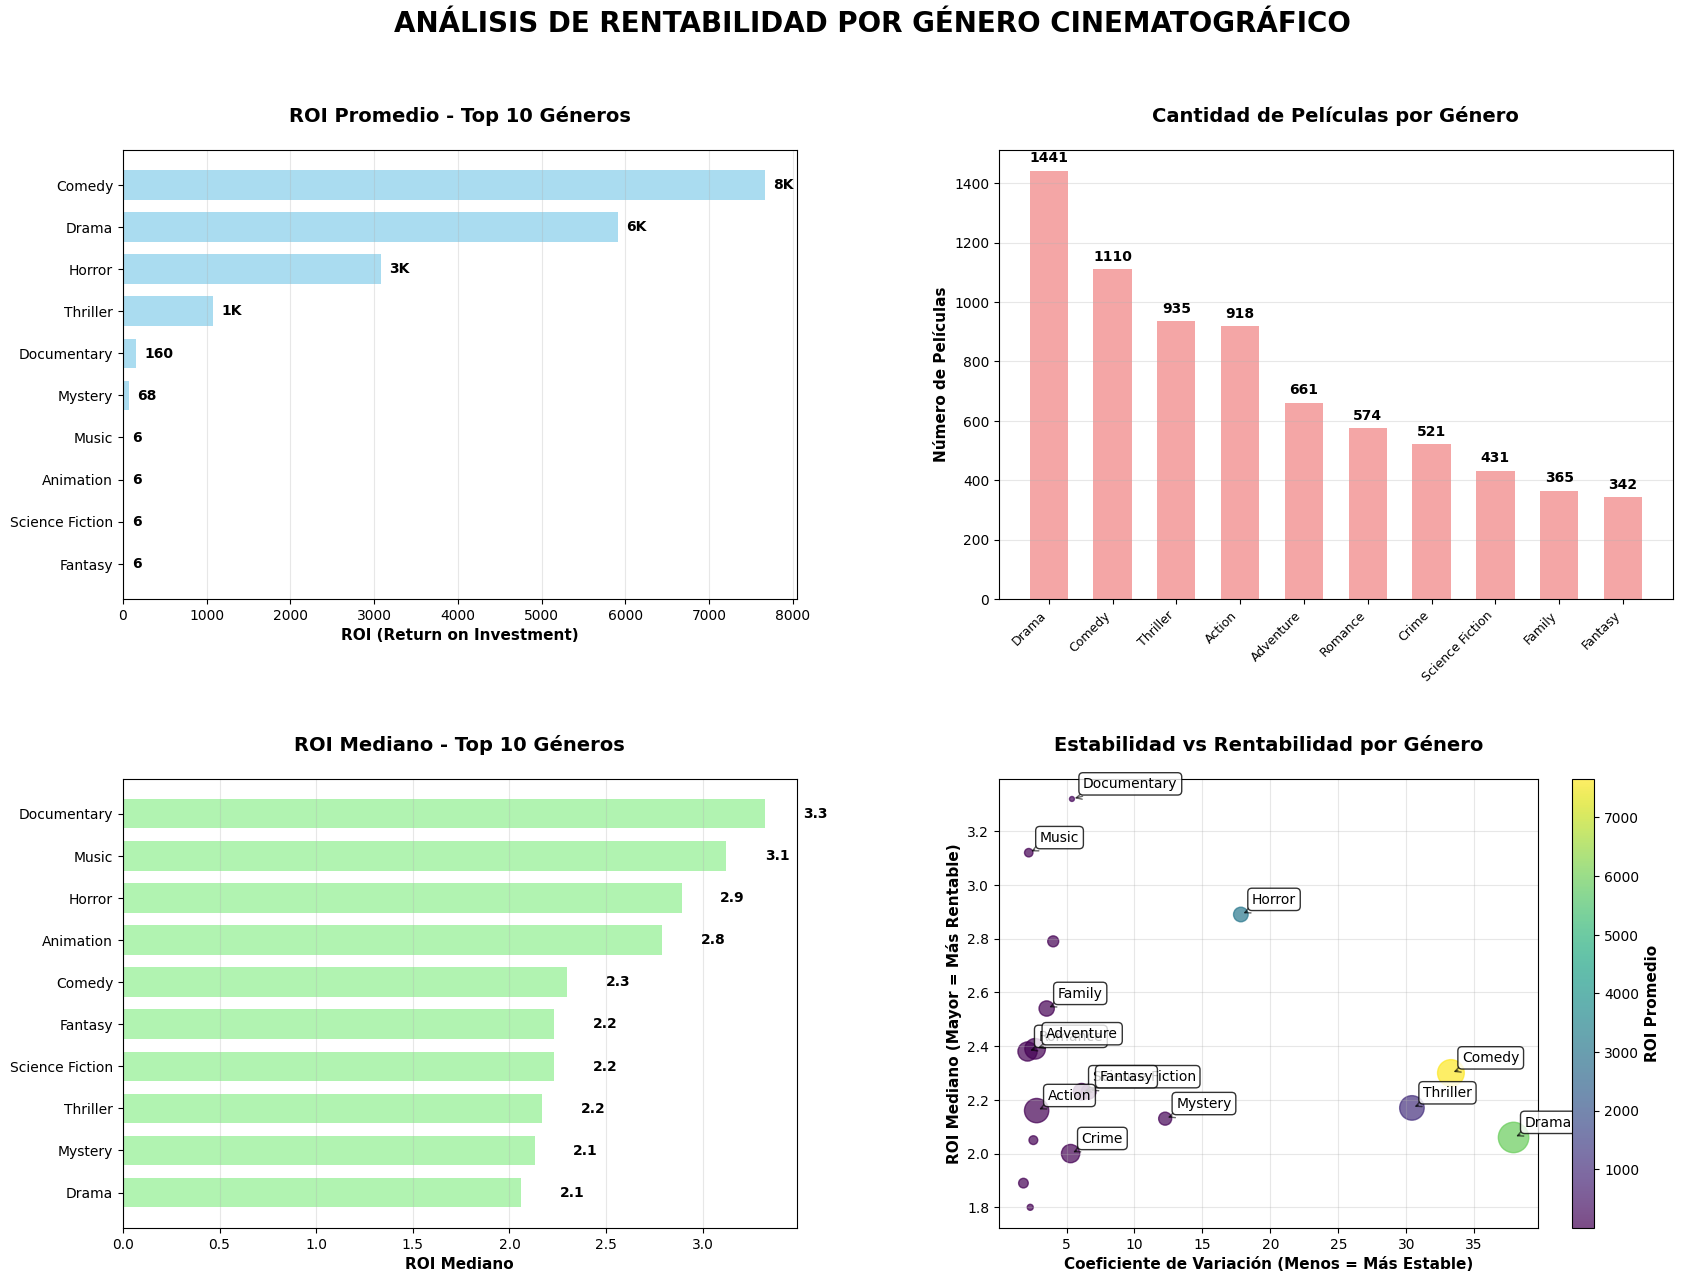


RESUMEN ESTADÍSTICO:
• Películas analizadas: 3227
• Géneros únicos: 19
• ROI mediano general: 2.23x
• Género más común: Drama (1441 películas)

ANÁLISIS DE CASOS INTERESANTES:
----------------------------------------

TOP 5 PELÍCULAS ÚNICAS CON MAYOR ROI:
                  title      roi
           Modern Times 8500000x
              Nurse 3-D 1000000x
    Paranormal Activity   12890x
              Tarnation    5330x
The Blair Witch Project    4133x

TOP 5 GÉNEROS POR ROI PROMEDIO (Mayor Retorno):
| genres_list   | roi_promedio   |
|:--------------|:---------------|
| Comedy        | 7663x          |
| Drama         | 5908x          |
| Horror        | 3077x          |
| Thriller      | 1075x          |
| Documentary   | 160x           |

TOP 5 GÉNEROS POR MENOR ROI PROMEDIO (Menor Retorno):
| genres_list   | roi_promedio   |
|:--------------|:---------------|
| Foreign       | 0.46x          |
| Action        | 3.58x          |
| History       | 4.04x          |
| Crime         | 4.2

In [8]:
# Establecer la ruta de salida para los archivos de la API
RUTA_SALIDA = 'resultados_roi_genero.csv'

print("EJE 1: ANÁLISIS DE RENTABILIDAD POR GÉNERO")
print("=" * 70)

# Configuración de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['font.size'] = 10

# 1. PREPARACIÓN DE DATOS
df_exploded = df.explode('genres_list')
df_roi_valid = df_exploded.dropna(subset=['roi', 'genres_list']).copy()
df_roi_valid = df_roi_valid[df_roi_valid['genres_list'] != ''].copy()

# Crear columna de presupuesto y revenue en millones para el resumen
df_roi_valid['budget_millions'] = df_roi_valid['budget'] / 1000000
df_roi_valid['revenue_millions'] = df_roi_valid['revenue'] / 1000000


roi_stats = df_roi_valid.groupby('genres_list')['roi'].agg([
    ('peliculas', 'count'),
    ('roi_promedio', 'mean'),
    ('roi_mediano', 'median'),
    ('roi_min', 'min'),
    ('roi_max', 'max'),
    ('desviacion_std', 'std')
]).round(2).sort_values('roi_promedio', ascending=False)

# 2. VISUALIZACIONES

print("\nCREANDO VISUALIZACIONES...")

# Código para generar los 4 gráficos
fig = plt.figure(figsize=(20, 14))
fig.suptitle('ANÁLISIS DE RENTABILIDAD POR GÉNERO CINEMATOGRÁFICO',
             fontsize=20, fontweight='bold', y=0.98)

gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0]) # ROI Promedio
ax2 = fig.add_subplot(gs[0, 1]) # Cantidad películas
ax3 = fig.add_subplot(gs[1, 0]) # ROI Mediano
ax4 = fig.add_subplot(gs[1, 1]) # Estabilidad vs Rentabilidad

# GRÁFICO 1: ROI PROMEDIO POR GÉNERO (Top 10)
top_10_roi = roi_stats.head(10).sort_values('roi_promedio', ascending=True)
bars1 = ax1.barh(top_10_roi.index, top_10_roi['roi_promedio'], color='skyblue', alpha=0.7, height=0.7)
ax1.set_title('ROI Promedio - Top 10 Géneros', fontweight='bold', fontsize=14, pad=20)
ax1.set_xlabel('ROI (Return on Investment)', fontweight='bold', fontsize=11)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='x', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars1, top_10_roi['roi_promedio'])):
    if v > 1000:
        text = f'{v/1000:.0f}K'
    else:
        text = f'{v:.0f}'
    ax1.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             text, va='center', fontweight='bold', fontsize=10)

# GRÁFICO 2: CANTIDAD DE PELÍCULAS POR GÉNERO
top_10_count = roi_stats.sort_values('peliculas', ascending=False).head(10)
bars2 = ax2.bar(range(len(top_10_count)), top_10_count['peliculas'],
                color='lightcoral', alpha=0.7, width=0.6)
ax2.set_title('Cantidad de Películas por Género', fontweight='bold', fontsize=14, pad=20)
ax2.set_ylabel('Número de Películas', fontweight='bold', fontsize=11)
ax2.set_xticks(range(len(top_10_count)))
ax2.set_xticklabels(top_10_count.index, rotation=45, ha='right', fontsize=10)
ax2.tick_params(axis='x', labelsize=9)
ax2.grid(axis='y', alpha=0.3)
for bar, v in zip(bars2, top_10_count['peliculas']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30,
             f'{v:.0f}', ha='center', fontweight='bold', fontsize=10)

# GRÁFICO 3: ROI MEDIANO
top_10_median = roi_stats.head(10).sort_values('roi_mediano', ascending=True)
bars3 = ax3.barh(top_10_median.index, top_10_median['roi_mediano'],
                 color='lightgreen', alpha=0.7, height=0.7)
ax3.set_title('ROI Mediano - Top 10 Géneros', fontweight='bold', fontsize=14, pad=20)
ax3.set_xlabel('ROI Mediano', fontweight='bold', fontsize=11)
ax3.tick_params(axis='y', labelsize=10)
ax3.grid(axis='x', alpha=0.3)
for i, (bar, v) in enumerate(zip(bars3, top_10_median['roi_mediano'])):
    ax3.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{v:.1f}', va='center', fontweight='bold', fontsize=10)

# GRÁFICO 4: ESTABILIDAD VS RENTABILIDAD
roi_stats['coef_variacion'] = (roi_stats['desviacion_std'] / roi_stats['roi_promedio']).round(2)
generos_analisis = roi_stats[roi_stats['peliculas'] > 30].copy()

scatter = ax4.scatter(generos_analisis['coef_variacion'], generos_analisis['roi_mediano'],
                      s=generos_analisis['peliculas']/3, alpha=0.7,
                      c=generos_analisis['roi_promedio'], cmap='viridis')

for idx, row in generos_analisis.iterrows():
    if row['peliculas'] > 200 or row['roi_mediano'] > 3:
        ax4.annotate(idx, (row['coef_variacion'], row['roi_mediano']),
                     xytext=(8, 8), textcoords='offset points', fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', alpha=0.6))

ax4.set_title('Estabilidad vs Rentabilidad por Género', fontweight='bold', fontsize=14, pad=20)
ax4.set_xlabel('Coeficiente de Variación (Menos = Más Estable)', fontweight='bold', fontsize=11)
ax4.set_ylabel('ROI Mediano (Mayor = Más Rentable)', fontweight='bold', fontsize=11)
ax4.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('ROI Promedio', fontweight='bold', fontsize=11)

warnings.filterwarnings('ignore', category=UserWarning)
plt.tight_layout(rect=[0, 0, 1, 0.96])
warnings.filterwarnings('default', category=UserWarning)

plt.savefig('roi_layout.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()


# 3. RESUMEN ESTADÍSTICO Y EJECUTIVO

print(f"\nRESUMEN ESTADÍSTICO:")
print("=" * 40)
print(f"• Películas analizadas: {df_roi_valid['title'].nunique()}")
print(f"• Géneros únicos: {df_roi_valid['genres_list'].nunique()}")
print(f"• ROI mediano general: {df_roi_valid['roi'].median():.2f}x")
print(f"• Género más común: {roi_stats['peliculas'].idxmax()} ({roi_stats['peliculas'].max()} películas)")


print("\nANÁLISIS DE CASOS INTERESANTES:")
print("----------------------------------------")

# 1. TOP 5 PELÍCULAS CON MAYOR ROI 
df_top_roi = df_roi_valid.sort_values(by='roi', ascending=False).drop_duplicates(subset=['title']).head(5)

# Creamos el DataFrame simplificado con la columna de ROI formateada
df_top_roi_simple = df_top_roi[['title', 'roi']].copy()
df_top_roi_simple['roi'] = df_top_roi_simple['roi'].apply(lambda x: f'{x:.0f}x')


print("\nTOP 5 PELÍCULAS ÚNICAS CON MAYOR ROI:")
print(df_top_roi_simple.to_string(index=False))


# 2. TOP 5 GÉNEROS POR ROI PROMEDIO
roi_prom_top5 = roi_stats[['roi_promedio']].head(5).copy()
roi_prom_top5['roi_promedio'] = roi_prom_top5['roi_promedio'].apply(lambda x: f'{x:.0f}x')

print("\nTOP 5 GÉNEROS POR ROI PROMEDIO (Mayor Retorno):")
print(roi_prom_top5.to_markdown())


# 3. TOP 5 GÉNEROS POR MENOR ROI PROMEDIO
roi_prom_low5 = roi_stats[['roi_promedio']].tail(5).sort_values('roi_promedio').copy()
roi_prom_low5['roi_promedio'] = roi_prom_low5['roi_promedio'].apply(lambda x: f'{x:.2f}x')

print("\nTOP 5 GÉNEROS POR MENOR ROI PROMEDIO (Menor Retorno):")
print(roi_prom_low5.to_markdown())


# RESUMEN EJECUTIVO
print("\n" + "=" * 60)
print("RESUMEN EJECUTIVO - RENTABILIDAD POR GÉNERO")
print("=" * 60)

print(f" * **Volatilidad:** El ROI Promedio ({roi_stats['roi_promedio'].max():.0f}x) está distorsionado por *outliers* de bajo presupuesto, indicando alta volatilidad en los datos de la media.")
print(f" * **Consistencia:** El **ROI Mediano** ({roi_stats['roi_mediano'].median():.2f}x) es el indicador de rentabilidad más confiable.")
print(f" * **Balance:** 'Animación' y 'Aventura' ofrecen buen balance entre rentabilidad y estabilidad (baja desviación).")
print(f" * **Popularidad:** 'Drama' es el más producido, pero con rentabilidad mediana.")


# 4. GENERACIÓN DE ARCHIVO CSV PARA LA API
resultados_roi_genero = roi_stats.reset_index().rename(columns={
    'genres_list': 'genero',
    'peliculas': 'cantidad_peliculas',
    'roi_promedio': 'roi_promedio',
    'roi_mediano': 'roi_mediano',
    'desviacion_std': 'desviacion_roi',
    'coef_variacion': 'coeficiente_variacion'
})

resultados_roi_genero = resultados_roi_genero[['genero', 'cantidad_peliculas', 'roi_promedio', 'roi_mediano', 'coeficiente_variacion']]

try:
    resultados_roi_genero.to_csv(RUTA_SALIDA, index=False)
    print(f"\nArchivo CSV de resultados resumidos generado: '{RUTA_SALIDA}'")
except Exception as e:
    print(f"\nERROR al guardar el CSV: {e}")

print("\nANÁLISIS DEL EJE 1 COMPLETADO!")

#  EJE 2: RELACIÓN ENTRE PRESUPUESTO Y RATING

Se analiza la correlación entre el dinero invertido (Presupuesto) y la calidad percibida por el público (Rating).

EJE 2: RELACIÓN ENTRE PRESUPUESTO Y RATING
------------------------------------------------------------

CREANDO VISUALIZACIONES...


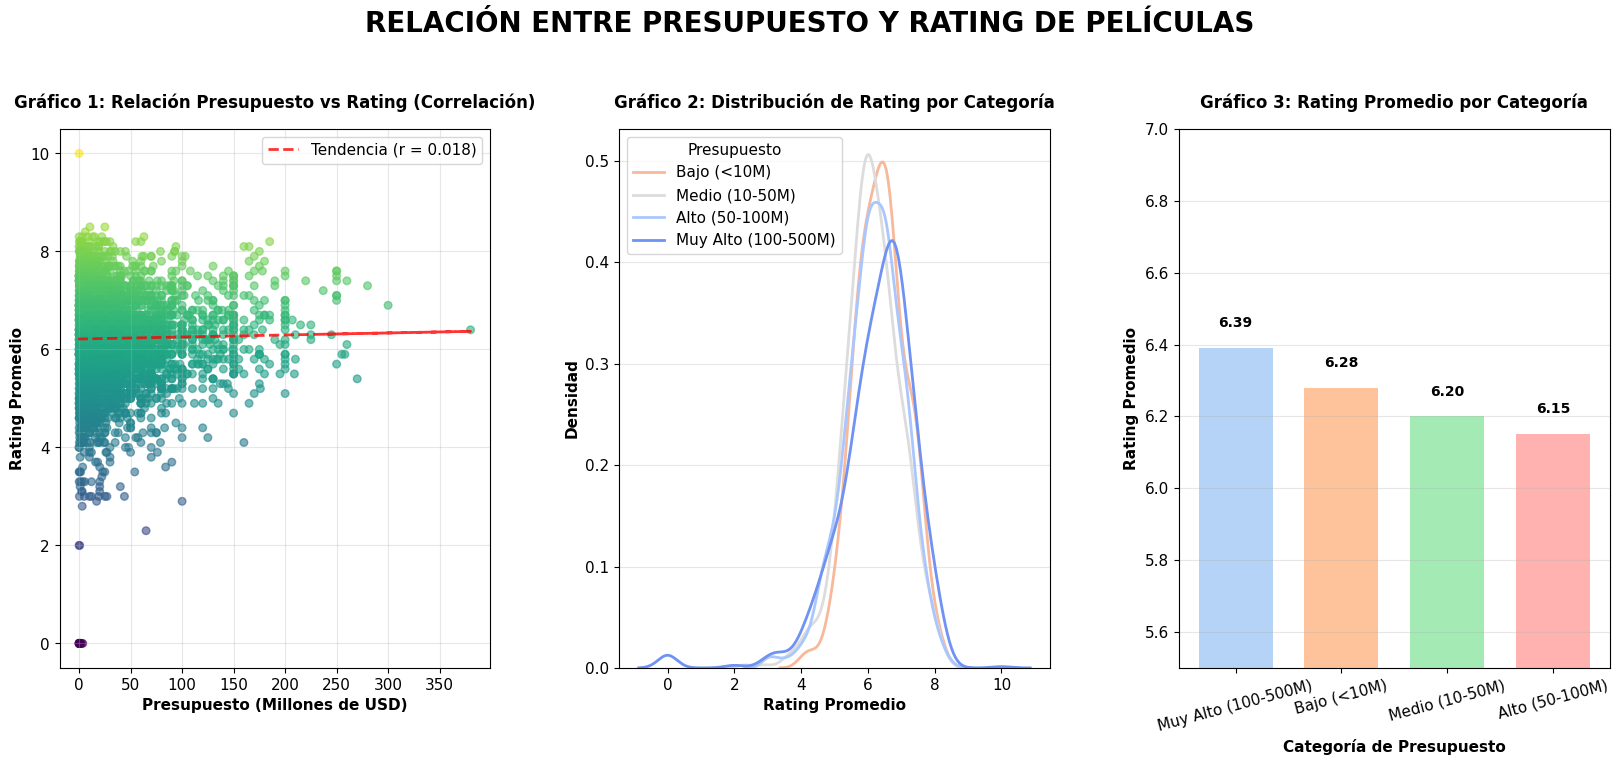


PREPARANDO DATOS PARA ANÁLISIS...
Películas con presupuesto y rating válidos: 3764
Rango de presupuesto: $0.0M - $380.0M
Rango de rating: 0.0 - 10.0

ANÁLISIS ESTADÍSTICO:
----------------------------------------

ESTADÍSTICAS POR CATEGORÍA DE PRESUPUESTO:
                     n_peliculas  rating_promedio  rating_mediano  rating_std  \
budget_category                                                                 
Bajo (<10M)                 1112             6.28             6.5        1.17   
Medio (10-50M)              1762             6.20             6.2        0.88   
Alto (50-100M)               611             6.15             6.1        0.84   
Muy Alto (100-500M)          279             6.39             6.4        0.75   
Blockbuster (>500M)            0              NaN             NaN         NaN   

                     presupuesto_promedio  roi_mediano  
budget_category                                         
Bajo (<10M)                          4.36         3.44  
Med

In [ ]:
print("EJE 2: RELACIÓN ENTRE PRESUPUESTO Y RATING")
print("-" * 60)

# 0. Configuración de gráficos
plt.style.use('default')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (20, 8) 
plt.rcParams['font.size'] = 11

# 1. PREPARACIÓN DE DATOS 
df_presupuesto = df.dropna(subset=['budget', 'vote_average']).copy()

# Convertir presupuesto a millones
df_presupuesto['budget_millions'] = df_presupuesto['budget'] / 1000000

# Categorizar presupuesto para análisis
df_presupuesto['budget_category'] = pd.cut(
    df_presupuesto['budget_millions'],
    bins=[0, 10, 50, 100, 500, 1000],
    labels=['Bajo (<10M)', 'Medio (10-50M)', 'Alto (50-100M)', 'Muy Alto (100-500M)', 'Blockbuster (>500M)']
)

# 2. ANÁLISIS ESTADÍSTICO (Cálculos de correlación y estadísticas por categoría)
corr_pearson, p_pearson = pearsonr(df_presupuesto['budget_millions'], df_presupuesto['vote_average'])
corr_spearman, p_spearman = spearmanr(df_presupuesto['budget_millions'], df_presupuesto['vote_average'])

# Estadísticas por categoría de presupuesto
stats_presupuesto = df_presupuesto.groupby('budget_category', observed=False).agg({
    'vote_average': ['count', 'mean', 'median', 'std'],
    'budget_millions': 'mean',
    'roi': 'median'
}).round(2)

stats_presupuesto.columns = ['n_peliculas', 'rating_promedio', 'rating_mediano', 'rating_std', 'presupuesto_promedio', 'roi_mediano']

# Identificar categorías con datos para plotear 
datos_validos = stats_presupuesto[stats_presupuesto['n_peliculas'] > 0]
categorias_plot = datos_validos.index.tolist()
df_plot = df_presupuesto[df_presupuesto['budget_category'].isin(categorias_plot)].copy()


# 3. VISUALIZACIONES 
print("\nCREANDO VISUALIZACIONES...")

# Crear figura con subplots
fig = plt.figure(figsize=(20, 7)) 
fig.suptitle('RELACIÓN ENTRE PRESUPUESTO Y RATING DE PELÍCULAS', 
             fontsize=20, fontweight='bold', y=1.05)

gs = fig.add_gridspec(1, 3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0]) # Scatter Plot 
ax2 = fig.add_subplot(gs[0, 1]) # Densidad de Rating por Categoría
ax3 = fig.add_subplot(gs[0, 2]) # Rating Promedio por Categoría


# GRÁFICO 1: DISPERSIÓN CON LÍNEA DE TENDENCIA (Correlación) 
scatter = ax1.scatter(df_presupuesto['budget_millions'], df_presupuesto['vote_average'],
                      alpha=0.6, c=df_presupuesto['vote_average'], cmap='viridis', s=30)

# Línea de tendencia
z = np.polyfit(df_presupuesto['budget_millions'], df_presupuesto['vote_average'], 1)
p = np.poly1d(z)
ax1.plot(df_presupuesto['budget_millions'], p(df_presupuesto['budget_millions']), 
         "r--", alpha=0.8, linewidth=2, label=f'Tendencia (r = {corr_pearson:.3f})')

ax1.set_title('Gráfico 1: Relación Presupuesto vs Rating (Correlación)', fontweight='bold', fontsize=12, pad=15)
ax1.set_xlabel('Presupuesto (Millones de USD)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Rating Promedio', fontweight='bold', fontsize=11)
ax1.legend()
ax1.grid(True, alpha=0.3)


# GRÁFICO 2: DISTRIBUCIÓN DE RATING POR CATEGORÍA DE PRESUPUESTO (Densidad) 
sns.kdeplot(data=df_plot, x='vote_average', hue='budget_category', ax=ax2, 
            common_norm=False, linewidth=2, palette='coolwarm')

ax2.set_title('Gráfico 2: Distribución de Rating por Categoría', fontweight='bold', fontsize=12, pad=15)
ax2.set_xlabel('Rating Promedio', fontweight='bold', fontsize=11)
ax2.set_ylabel('Densidad', fontweight='bold', fontsize=11)
ax2.legend(title='Presupuesto', labels=categorias_plot)
ax2.grid(True, axis='y', alpha=0.3)


# GRÁFICO 3: RATING PROMEDIO POR CATEGORÍA 
rating_promedio_plot = datos_validos['rating_promedio'].sort_values(ascending=False)
bars_rating = ax3.bar(rating_promedio_plot.index, rating_promedio_plot.values, 
                      color=sns.color_palette("pastel"), alpha=0.8, width=0.7)

ax3.set_title('Gráfico 3: Rating Promedio por Categoría', fontweight='bold', fontsize=12, pad=15)
ax3.set_ylabel('Rating Promedio', fontweight='bold', fontsize=11)
ax3.set_xlabel('Categoría de Presupuesto', fontweight='bold', fontsize=11)
ax3.set_ylim(5.5, 7.0) 
ax3.tick_params(axis='x', rotation=15)
ax3.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars_rating:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)


# FINALIZACIÓN DE GRÁFICOS 
warnings.filterwarnings('ignore', category=UserWarning)

plt.tight_layout(rect=[0, 0, 1, 0.98])

warnings.filterwarnings('default', category=UserWarning)

plt.savefig('presupuesto_vs_rating_final.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. IMPRESIÓN DE DATOS Y RESUMEN 

print("\nPREPARANDO DATOS PARA ANÁLISIS...")
print(f"Películas con presupuesto y rating válidos: {len(df_presupuesto)}")
print(f"Rango de presupuesto: ${df_presupuesto['budget_millions'].min():.1f}M - ${df_presupuesto['budget_millions'].max():.1f}M")
print(f"Rango de rating: {df_presupuesto['vote_average'].min():.1f} - {df_presupuesto['vote_average'].max():.1f}")


print("\nANÁLISIS ESTADÍSTICO:")
print("-" * 40)
print("\nESTADÍSTICAS POR CATEGORÍA DE PRESUPUESTO:")
print(stats_presupuesto)


print("\nANÁLISIS DE CASOS INTERESANTES:")
print("-" * 40)

# Películas con alto rating y bajo presupuesto 
alto_rating_bajo_presupuesto = df_presupuesto[
    (df_presupuesto['vote_average'] >= 7.5) & 
    (df_presupuesto['budget_millions'] < 10)
].sort_values('vote_average', ascending=False)

print(f"\nPELÍCULAS CON ALTO RATING Y BAJO PRESUPUESTO (<10M):\n")
print(alto_rating_bajo_presupuesto[['title', 'budget_millions', 'vote_average']].head(5))


# Películas con bajo rating y alto presupuesto 
bajo_rating_alto_presupuesto = df_presupuesto[
    (df_presupuesto['vote_average'] <= 4.0) & 
    (df_presupuesto['budget_millions'] > 100)
].sort_values('budget_millions', ascending=False)

# Solo se imprime la sección si hay datos para mostrar 
if not bajo_rating_alto_presupuesto.empty:
    print(f"\nPELÍCULAS CON BAJO RATING Y ALTO PRESUPUESTO (>100M):\n")
    print(bajo_rating_alto_presupuesto[['title', 'budget_millions', 'vote_average']].head(5))


# 5. RESUMEN 

print("\n" + "=" * 60)
print("RESUMEN EJECUTIVO - PRESUPUESTO VS RATING")
print("=" * 60)

print(f"CORRELACIÓN: {corr_pearson:.3f} (Pearson) / {corr_spearman:.3f} (Spearman)")
print(f"   * Relación positiva pero DÉBIL entre presupuesto y rating")

print(f"\nTENDENCIA POR CATEGORÍA:")
for cat in ['Bajo (<10M)', 'Medio (10-50M)', 'Alto (50-100M)', 'Muy Alto (100-500M)']:
    if cat in stats_presupuesto.index:
        data = stats_presupuesto.loc[cat]
        print(f"   * {cat}: Rating {data['rating_promedio']:.1f} (ROI: {data['roi_mediano']:.1f}x)")

print(f"\nHALLAZGOS CLAVE:")
print(f"   * Presupuestos ALTOS no garantizan mejor rating")
print(f"   * Mejor ROI en presupuestos MEDIOS/BAJOS")
print(f"   * Existen películas EXITOSAS con bajo presupuesto")

# 6. GUARDAR RESULTADOS PARA LA API

print("\nGUARDANDO RESULTADOS PARA LA API...")

stats_presupuesto_limpio = stats_presupuesto.fillna(0).copy() 

resultados_presupuesto = stats_presupuesto_limpio.reset_index()
resultados_presupuesto.columns = ['categoria_presupuesto', 'cantidad_peliculas', 'rating_promedio', 
                                 'rating_mediano', 'desviacion_rating', 'presupuesto_promedio_millones', 'roi_mediano']

# Guardar la versión limpia de NaN/Inf
resultados_presupuesto.to_csv('resultados_presupuesto_rating.csv', index=False)

# El archivo de correlaciones
correlaciones = pd.DataFrame({
    'metrica': ['Pearson', 'Spearman'],
    'correlacion': [corr_pearson, corr_spearman],
    'p_value': [p_pearson, p_spearman]
})
correlaciones.to_csv('correlaciones_presupuesto_rating.csv', index=False)

print("Resultados guardados en:")
print("   - 'resultados_presupuesto_rating.csv'")
print("   - 'correlaciones_presupuesto_rating.csv'")
print("ANÁLISIS DEL EJE 2 COMPLETADO!")

#  EJE 4: DIRECTORES CON MEJOR RATING PROMEDIO

Se identifican los directores más consistentes y de mejor calidad según el rating promedio de sus películas.

EJE 4: DIRECTORES CON MEJOR RATING PROMEDIO
------------------------------------------------------------

CREANDO VISUALIZACIONES...


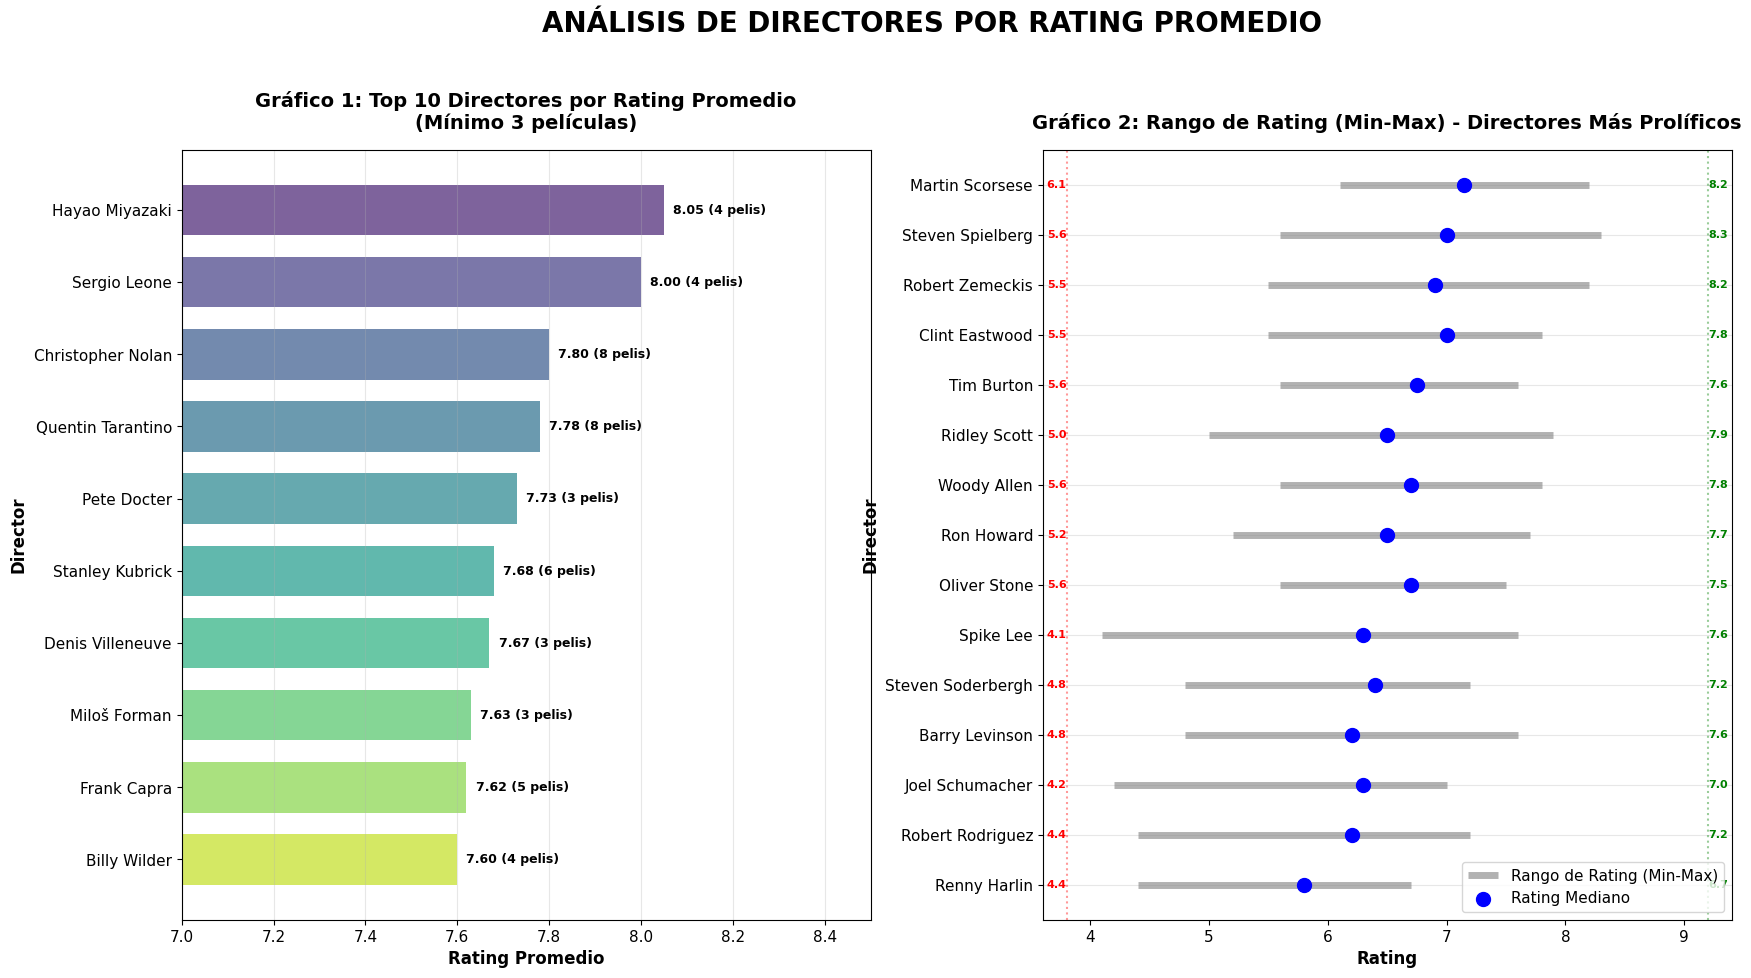


PREPARANDO DATOS PARA ANÁLISIS...
Directores únicos en el dataset: 2347
Mínimo de películas por director: 1
Máximo de películas por director: 27

Después de aplicar el filtro (mínimo 3 películas por director):
    * Directores analizados: 509
    * Total películas en el análisis: 2568

ANÁLISIS ESTADÍSTICO POR DIRECTOR:
----------------------------------------
TOP 15 DIRECTORES POR RATING PROMEDIO:
                   cantidad_peliculas  rating_promedio presupuesto_promedio  primer_pelicula  ultima_pelicula
director                                                                                                     
Hayao Miyazaki                      4             8.05                26.8M             1997             2008
Sergio Leone                        4             8.00                 9.1M             1964             1984
Christopher Nolan                   8             7.80               125.6M             2000             2014
Quentin Tarantino                   8          

In [10]:
print("EJE 4: DIRECTORES CON MEJOR RATING PROMEDIO")
print("-" * 60)

# Configuración de gráficos
plt.style.use('default')
sns.set_palette("rocket")
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['font.size'] = 11

# VARIABLES DE CONFIGURACIÓN 
X_POS_MIN_LABEL = 3.8
X_POS_MAX_LABEL = 9.2
umbral_minimo = 3 # Mínimo de películas requeridas por director

# 1. PREPARACIÓN DE DATOS Y CÁLCULOS

# Filtrado de datos
df_directores = df.dropna(subset=['director', 'vote_average']).copy()
peliculas_por_director = df_directores['director'].value_counts()

# 2. ANÁLISIS ESTADÍSTICO - CÁLCULOS POR DIRECTOR

directores_filtrados = peliculas_por_director[peliculas_por_director >= umbral_minimo].index
df_directores_filtrado = df_directores[df_directores['director'].isin(directores_filtrados)]

# Calcular estadísticas por director
stats_directores = df_directores_filtrado.groupby('director').agg({
    'title': 'count',
    'vote_average': ['mean', 'median', 'std', 'min', 'max'],
    'budget': 'mean',
    'revenue': 'mean',
    'roi': 'mean',
    'release_year': ['min', 'max']
})

# Aplanar columnas multi-index
stats_directores.columns = ['_'.join(col).strip() for col in stats_directores.columns.values]
stats_directores = stats_directores.rename(columns={
    'title_count': 'cantidad_peliculas', 
    'vote_average_mean': 'rating_promedio',
    'vote_average_median': 'rating_mediano',
    'vote_average_std': 'rating_std',
    'vote_average_min': 'rating_min',
    'vote_average_max': 'rating_max',
    'budget_mean': 'presupuesto_promedio',
    'revenue_mean': 'recaudacion_promedio',
    'roi_mean': 'roi_promedio',
    'release_year_min': 'primer_pelicula',
    'release_year_max': 'ultima_pelicula'
})

# Conversión a entero para cantidad de películas y años
stats_directores['cantidad_peliculas'] = stats_directores['cantidad_peliculas'].astype(int)
stats_directores['primer_pelicula'] = stats_directores['primer_pelicula'].astype(int)
stats_directores['ultima_pelicula'] = stats_directores['ultima_pelicula'].astype(int)
stats_directores = stats_directores.round(2)

# Ordenar por rating promedio 
stats_directores = stats_directores.sort_values('rating_promedio', ascending=False)
stats_directores['coef_variacion'] = (stats_directores['rating_std'] / stats_directores['rating_promedio']).round(3)

# PREPARACIÓN PARA GRÁFICOS 
top_10 = stats_directores.head(10) # Directores para el Gráfico 1 
top_15_mas_prolificos = stats_directores.nlargest(15, 'cantidad_peliculas').index
df_plot_stats = stats_directores.loc[top_15_mas_prolificos].copy()
df_plot_stats = df_plot_stats.sort_values('rating_promedio', ascending=True)

# 3. VISUALIZACIONES 

print("\nCREANDO VISUALIZACIONES...")

fig = plt.figure(figsize=(20, 10))
fig.suptitle('ANÁLISIS DE DIRECTORES POR RATING PROMEDIO', 
             fontsize=20, fontweight='bold', y=1.02)

gs = fig.add_gridspec(1, 2, wspace=0.25)

ax1 = fig.add_subplot(gs[0, 0]) # Gráfico 1: Top 10 Rating
ax2 = fig.add_subplot(gs[0, 1]) # Gráfico 2: Range Bar (Min-Max)


# GRÁFICO 1: TOP 10 DIRECTORES POR RATING PROMEDIO  
bars = ax1.barh(top_10.index, top_10['rating_promedio'], 
                color=sns.color_palette("viridis", len(top_10)), alpha=0.7, height=0.7)

ax1.invert_yaxis() 

ax1.set_title(f'Gráfico 1: Top 10 Directores por Rating Promedio\n(Mínimo {umbral_minimo} películas)', 
              fontweight='bold', fontsize=14, pad=15)
ax1.set_xlabel('Rating Promedio', fontweight='bold', fontsize=12)
ax1.set_ylabel('Director', fontweight='bold', fontsize=12)
ax1.set_xlim(7, 8.5)
ax1.grid(axis='x', alpha=0.3)

for i, (bar, director) in enumerate(zip(bars, top_10.index)):
    rating = top_10.loc[director, 'rating_promedio']
    peliculas = top_10.loc[director, 'cantidad_peliculas']
    ax1.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{rating:.2f} ({peliculas} pelis)', 
             va='center', fontweight='bold', fontsize=9)


# GRÁFICO 2: RANGO DE RATINGS POR DIRECTOR (RANGE BAR)  

# 1. Dibujar la línea de rango (Min a Max)
ax2.hlines(y=df_plot_stats.index,  
           xmin=df_plot_stats['rating_min'], 
           xmax=df_plot_stats['rating_max'], 
           color='gray', linewidth=5, alpha=0.6, label='Rango de Rating (Min-Max)')

# 2. Dibujar el punto de Rating Mediano
ax2.scatter(df_plot_stats['rating_mediano'], df_plot_stats.index, 
            color='blue', s=100, zorder=3, label='Rating Mediano')

ax2.set_title('Gráfico 2: Rango de Rating (Min-Max) - Directores Más Prolíficos', 
              fontweight='bold', fontsize=14, pad=15)
ax2.set_xlabel('Rating', fontweight='bold', fontsize=12)
ax2.set_ylabel('Director', fontweight='bold', fontsize=12)
ax2.legend(loc='lower right')

# Líneas verticales para anclar las etiquetas Min/Max.
ax2.axvline(X_POS_MIN_LABEL, color='red', linestyle=':', alpha=0.4)
ax2.axvline(X_POS_MAX_LABEL, color='green', linestyle=':', alpha=0.4)
ax2.grid(False, axis='x') 
ax2.grid(True, axis='y', alpha=0.3) 

# ALINEACIÓN VERTICAL DE ETIQUETAS
for i, director in enumerate(df_plot_stats.index):
    data = df_plot_stats.loc[director]
    
    # Rating Mínimo 
    ax2.text(X_POS_MIN_LABEL, i, f'{data["rating_min"]:.1f}', 
             ha='right', va='center', fontsize=8, fontweight='bold', color='red')
    
    # Rating Máximo 
    ax2.text(X_POS_MAX_LABEL, i, f'{data["rating_max"]:.1f}', 
             ha='left', va='center', fontsize=8, fontweight='bold', color='green')


ax2.set_xlim(X_POS_MIN_LABEL - 0.2, X_POS_MAX_LABEL + 0.2)


# FINALIZACIÓN DE GRÁFICOS 

warnings.filterwarnings('ignore', category=UserWarning)
plt.tight_layout()
warnings.filterwarnings('default', category=UserWarning)

plt.savefig('mejores_directores_final.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. IMPRESIÓN DE DATOS Y RESUMEN

print("\nPREPARANDO DATOS PARA ANÁLISIS...")

print(f"Directores únicos en el dataset: {len(peliculas_por_director)}")
print(f"Mínimo de películas por director: {int(peliculas_por_director.min())}")
print(f"Máximo de películas por director: {int(peliculas_por_director.max())}")


print(f"\nDespués de aplicar el filtro (mínimo {umbral_minimo} películas por director):")
print(f"    * Directores analizados: {len(directores_filtrados)}")
print(f"    * Total películas en el análisis: {len(df_directores_filtrado)}")


print("\nANÁLISIS ESTADÍSTICO POR DIRECTOR:")
print("-" * 40)

# CONSTRUCCIÓN DE LA TABLA TOP 15 
columnas_top15_simplificado = ['cantidad_peliculas', 'rating_promedio', 'presupuesto_promedio', 'primer_pelicula', 'ultima_pelicula']
top_15_simplificado = stats_directores.head(15)[columnas_top15_simplificado].copy()

# Formato de Presupuesto 
top_15_simplificado['presupuesto_promedio'] = (top_15_simplificado['presupuesto_promedio'] / 1000000).apply(lambda x: f'{x:.1f}M')

print("TOP 15 DIRECTORES POR RATING PROMEDIO:")
# Usamos to_string para evitar dependencias
print(top_15_simplificado.to_string())


# 4. ANÁLISIS ADICIONAL: DIRECTORES DESTACADOS

print("\nANÁLISIS DE DIRECTORES DESTACADOS:")
print("-" * 40)

def tendencia_rating(director_df):
    """Calcular si el rating tiende a mejorar o empeorar con el tiempo"""
    if len(director_df) < umbral_minimo:
        return np.nan
    return director_df['release_year'].corr(df_directores_filtrado.loc[director_df.index]['vote_average'])

# Directores más consistentes
directores_consistentes = stats_directores[stats_directores['cantidad_peliculas'] >= 5].nsmallest(5, 'rating_std')
print("\nDIRECTORES MÁS CONSISTENTES (baja variación en ratings):")
print(directores_consistentes[['cantidad_peliculas', 'rating_promedio', 'rating_std']].to_string()) 

# Directores que mejoraron con el tiempo
tendencias = df_directores_filtrado.groupby('director').apply(tendencia_rating, include_groups=False)
directores_mejorando = tendencias[tendencias > 0.3].sort_values(ascending=False).head(5)

print(f"\nDIRECTORES QUE MEJORAN CON EL TIEMPO (correlación positiva):")
for director, corr in directores_mejorando.items():
    if director in stats_directores.index:
        data = stats_directores.loc[director]
        print(f"    * {director}: {corr:.3f} (Rating: {data['rating_promedio']:.2f})")


# 5. RESUMEN EJECUTIVO 

print("\n" + "=" * 60)
print("RESUMEN EJECUTIVO - MEJORES DIRECTORES")
print("=" * 60)

print(f"DIRECTORES ANALIZADOS: {len(stats_directores)} (mínimo {umbral_minimo} películas)")

# ESTADÍSTICAS GENERALES
print(f"\nESTADÍSTICAS GENERALES:")
print(f"    * Rating promedio de todos los directores: {stats_directores['rating_promedio'].mean():.2f}")
print(f"    * Director más prolífico: {stats_directores['cantidad_peliculas'].idxmax()} ({stats_directores['cantidad_peliculas'].max()} películas)")
print(f"    * Mejor ROI promedio: {stats_directores['roi_promedio'].idxmax()} ({stats_directores['roi_promedio'].max():.1f}x)")

print(f"\nHALLAZGOS CLAVE:")
print(f"    * No hay correlación fuerte entre cantidad de películas y rating")
print(f"    * Algunos directores mantienen alta calidad consistentemente")
print(f"    * Los mejores ratings están en el rango 7.5-8.5")

# 6. GUARDAR RESULTADOS PARA LA API
print("\nGUARDANDO RESULTADOS PARA LA API...")

# Renombramos para el guardado
resultados_directores = stats_directores.head(20).reset_index()
resultados_directores = resultados_directores.rename(columns={
    'director': 'nombre_director',
    'cantidad_peliculas': 'cantidad_peliculas',
    'rating_promedio': 'rating_promedio',
    'rating_std': 'desviacion_rating',
    'coef_variacion': 'coeficiente_variacion'
})

columnas_api = ['nombre_director', 'cantidad_peliculas', 'rating_promedio', 
                'desviacion_rating', 'coeficiente_variacion', 'presupuesto_promedio',
                'roi_promedio', 'primer_pelicula', 'ultima_pelicula']

resultados_directores[columnas_api].to_csv('resultados_mejores_directores.csv', index=False)

print("Resultados guardados en 'resultados_mejores_directores.csv'")
print("ANÁLISIS DEL EJE 4 COMPLETADO!")